In [615]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.dates import DateFormatter, WeekdayLocator , MonthLocator

<Axes: >

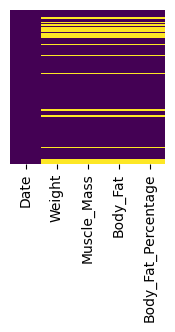

In [616]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # 禁用換行

inbody_df = pd.read_csv('inbody.csv')
inbody_df = inbody_df.drop(columns=['Visceral_Fat','BMI'])

#探索資料
plt.figure(figsize=(2, 2))
sns.heatmap(inbody_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [617]:
#檢查離奇數值
col_filter = 'Muscle_Mass'
std_range = 3
std_value = inbody_df[col_filter].std()
mean_value = inbody_df[col_filter].mean()
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)

inbody_df.loc[errorData.index,col_filter] = None
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)


      Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage
187  11/12    62.5         17.4      13.6                 21.7
Empty DataFrame
Columns: [Date, Weight, Muscle_Mass, Body_Fat, Body_Fat_Percentage]
Index: []


    Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage
0  05/09   67.20         28.5      16.1                 23.9
1  05/10   66.90         28.3      16.4                 24.5
2  05/11   66.70         27.9      16.9                 25.4
3  05/12   66.70         28.7      15.6                 23.4
4  05/13   67.25         28.4      16.7                 24.8


C:\Users\Tim\AppData\Local\Temp\ipykernel_20028\2171555111.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inbody_df = inbody_df.interpolate(method='linear', axis=0)#內插資訊


<Axes: >

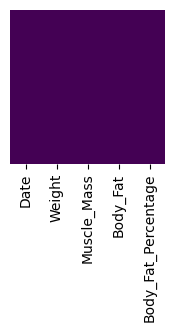

In [618]:
inbody_df = inbody_df.interpolate(method='linear', axis=0)#內插資訊
print(inbody_df.head(5))

#探索資料
plt.figure(figsize=(2, 2))
sns.heatmap(inbody_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [619]:
#正規化
def normalize_dataframe(df, col):
    to_normalize = scaler.fit_transform(df[[col]]) 
    df[col] = to_normalize

scaler = MinMaxScaler()

normalize = inbody_df

normalize_dataframe(normalize,'Weight')
normalize_dataframe(normalize,'Muscle_Mass')
normalize_dataframe(normalize,'Body_Fat')
normalize_dataframe(normalize,'Body_Fat_Percentage')

print(normalize)


      Date    Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage
0    05/09  0.900000     0.758621  0.689189             0.636364
1    05/10  0.850000     0.689655  0.729730             0.696970
2    05/11  0.816667     0.551724  0.797297             0.787879
3    05/12  0.816667     0.827586  0.621622             0.585859
4    05/13  0.908333     0.724138  0.770270             0.727273
..     ...       ...          ...       ...                  ...
216  12/11  0.116667     0.482759  0.270270             0.323232
217  12/12  0.116667     0.482759  0.270270             0.323232
218  12/13  0.116667     0.482759  0.270270             0.323232
219  12/14  0.116667     0.482759  0.270270             0.323232
220  12/15  0.116667     0.482759  0.270270             0.323232

[221 rows x 5 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


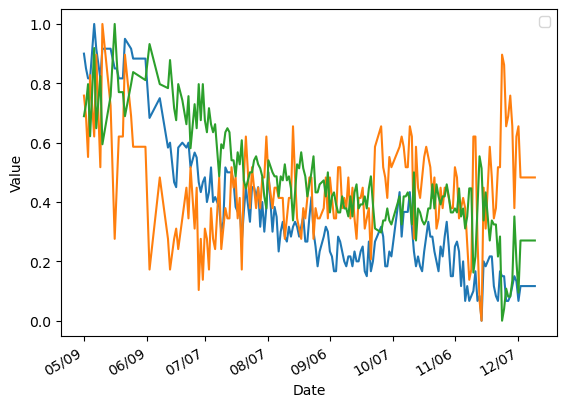

In [620]:


fig, ax = plt.subplots()
x = inbody_df["Date"]

# 设置 x 轴主刻度为每周
ax.xaxis.set_major_locator(MonthLocator())

def scatter_by_label(df,col_x,col_y):
    plt.scatter(df[col_x],df[col_y],s=3)
    plt.xlabel(col_x)
    plt.ylabel(col_y)

def plot_by_label(df,col_x,col_y):
    plt.plot(df[col_x],df[col_y])
    plt.xlabel(col_x)
    plt.ylabel(col_y)

plot_by_label(normalize,'Date','Weight')
plot_by_label(normalize,'Date','Muscle_Mass')
plot_by_label(normalize,'Date','Body_Fat')
#plot_by_label('Body_Fat_Percentage')
#plot_by_label('BMI')
#plot_by_label('Visceral_Fat')

# 添加图例
ax.legend()

# 添加 x 轴和 y 轴标签
plt.xlabel("Date")
plt.ylabel("Value")

# 自动调整日期标签以防止重叠
fig.autofmt_xdate()

# 显示图形
plt.show()


    Date  Squat_PR  Deadlift_PR  Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total
0  05/01     127.0          NaN      NaN             NaN         NaN                 NaN                NaN            7400.0
1  05/02       NaN          NaN      NaN            72.0         NaN              6175.0                NaN               NaN
2  05/03       NaN          NaN      NaN             NaN        81.0                 NaN             6066.0               NaN
3  05/04       NaN          NaN      NaN             NaN         NaN                 NaN                NaN               NaN
4  05/05       NaN          NaN      NaN             NaN         NaN                 NaN                NaN               NaN
5  05/06     127.0          NaN      NaN             NaN         NaN                 NaN                NaN            7780.0
6  05/07       NaN          NaN      NaN            86.0         NaN              7250.0                NaN           

<Axes: >

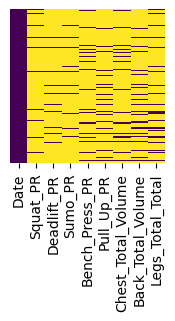

In [621]:
train_df = pd.read_csv('Train.csv')
pr_keys = ['Squat_PR','Deadlift_PR','Sumo_PR','Bench_Press_PR','Pull_Up_PR']

print(train_df.head(10))

#探索資料
plt.figure(figsize=(2, 2))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


    Date  Squat_PR  Deadlift_PR  Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total
0  05/01     127.0         74.0     90.0            72.0        81.0                 NaN                NaN            7400.0
1  05/02     127.0         74.0     90.0            72.0        81.0              6175.0                NaN               NaN
2  05/03     127.0         74.0     90.0            74.8        81.0                 NaN             6066.0               NaN
3  05/04     127.0         74.0     90.0            77.6        81.3                 NaN                NaN               NaN
4  05/05     127.0         74.0     90.0            80.4        81.6                 NaN                NaN               NaN
5  05/06     127.0         74.0     90.0            83.2        81.9                 NaN                NaN            7780.0
6  05/07     124.9         74.0     90.0            86.0        82.2              7250.0                NaN           

<Axes: >

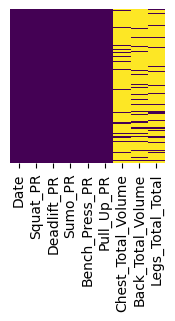

In [622]:
for pr_key in pr_keys:
    #內插資訊
    train_df[pr_key] = train_df[pr_key].interpolate(method='linear', axis=0)
    #補開頭
    train_df[pr_key].fillna(train_df[pr_key].ffill().bfill(), inplace=True)

print(train_df.head(10))

#探索資料
plt.figure(figsize=(2, 2))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


[0.00443185 0.02622189 0.09947714 0.24197072 0.37738323 0.37738323
 0.24197072 0.09947714 0.02622189 0.00443185]


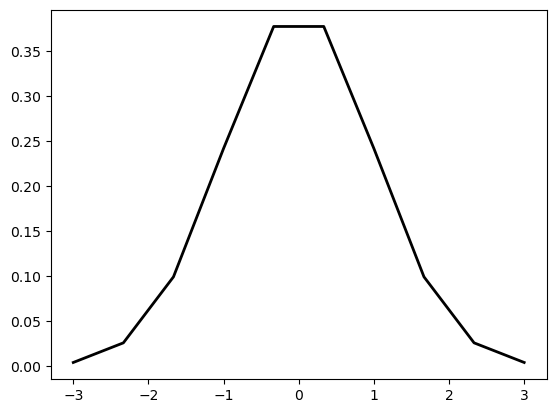

In [623]:
# 定义高斯分布的参数
mean_value = 0
std_dev = 1
array_size = 10

# 生成高斯分布的数据
x = np.linspace(mean_value - 3 * std_dev, mean_value + 3 * std_dev, array_size)
gd_ay = (1.0 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_value) / std_dev) ** 2)

# 绘制高斯分布曲线

plt.plot(x, gd_ay, 'k', linewidth=2)
print(gd_ay)

     Date    Squat_PR  Deadlift_PR     Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
0   05/01  127.000000        74.00   90.000000            72.0   81.000000         1395.051122         887.811196       4080.953447   6363.815765
1   05/02  127.000000        74.00   90.000000            72.0   81.000000         3691.410995        1370.425928       2819.001397   7880.838321
2   05/03  127.000000        74.00   90.000000            74.8   81.000000         2543.233307         938.518351       2067.066678   5548.818337
3   05/04  127.000000        74.00   90.000000            77.6   81.300000         1833.735655         704.541804       2157.016239   4695.293698
4   05/05  127.000000        74.00   90.000000            80.4   81.600000         1910.868570         778.483547       3424.585641   6113.937758
5   05/06  127.000000        74.00   90.000000            83.2   81.900000         2273.116863         834.768838       2483

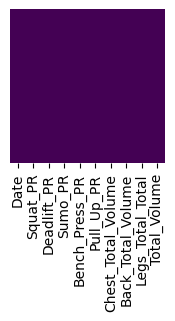

In [624]:
train_df['Total_Volume'] = train_df[['Chest_Total_Volume', 'Back_Total_Volume', 'Legs_Total_Total']].sum(axis=1)


#將訓練容量分散
def dispersion_Volume (col) :
    for i in range(len(train_df)) :
        val = train_df.loc[i, col]
        if val <= 0 or pd.isna(val):
            continue
        train_df.loc[i, col] = 0
        for j in range(-5,5) :
            addVal = gd_ay[j] * val 
            setIdx = i+j
            if setIdx < 0 or setIdx >= len(train_df) :
                continue
            if (pd.isna(train_df.loc[setIdx, col])):
                train_df.loc[setIdx, col] = 0
            train_df.loc[setIdx, col] += addVal

volume_kyes = ['Chest_Total_Volume','Back_Total_Volume','Legs_Total_Total','Total_Volume']
for volume_key in volume_kyes:
    dispersion_Volume(volume_key)

#探索資料
plt.figure(figsize=(2, 2))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#print("---")
print(train_df.head(30))


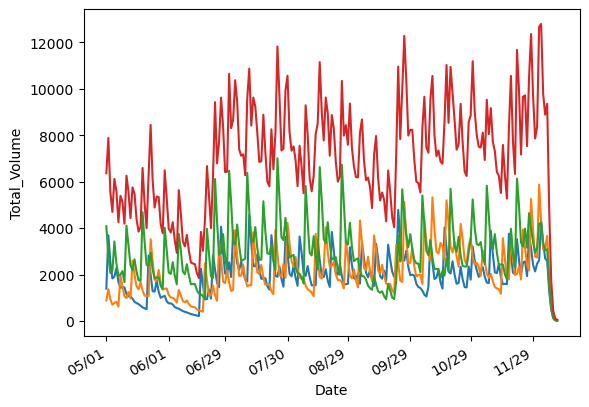

In [625]:
fig, ax = plt.subplots()
x = inbody_df["Date"]
ax.xaxis.set_major_locator(MonthLocator())

for volume_key in volume_kyes:
    plot_by_label(train_df,'Date',volume_key)

fig.autofmt_xdate()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<bound method NDFrame.keys of       Date  Squat_PR  Deadlift_PR  Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
0    05/01     127.0    74.000000     90.0            72.0        81.0         1395.051122         887.811196       4080.953447   6363.815765
1    05/02     127.0    74.000000     90.0            72.0        81.0         3691.410995        1370.425928       2819.001397   7880.838321
2    05/03     127.0    74.000000     90.0            74.8        81.0         2543.233307         938.518351       2067.066678   5548.818337
3    05/04     127.0    74.000000     90.0            77.6        81.3         1833.735655         704.541804       2157.016239   4695.293698
4    05/05     127.0    74.000000     90.0            80.4        81.6         1910.868570         778.483547       3424.585641   6113.937758
..     ...       ...          ...      ...             ...         ...                 ...                ...         

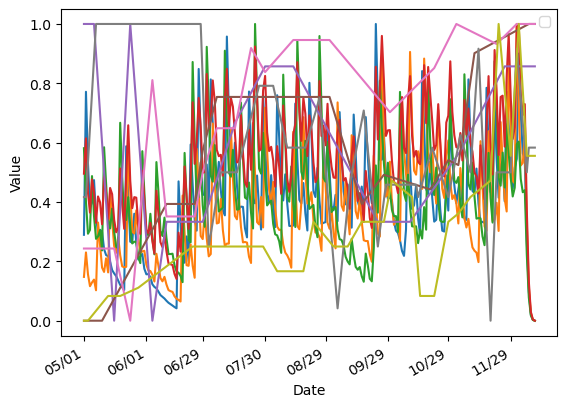

In [626]:
fig, ax = plt.subplots()
x = train_df["Date"]
print(train_df.keys)

normalize_train_df = train_df

for col in normalize_train_df.columns:
    if(col != 'Date'):  
        normalize_dataframe(normalize_train_df,col)
        
# 设置 x 轴主刻度为每周
ax.xaxis.set_major_locator(MonthLocator())

for volume_key in volume_kyes:
    plot_by_label(train_df,'Date',volume_key)

for pr_key in pr_keys:
    plot_by_label(train_df,'Date',pr_key)

#plot_by_label(train_df,'Date','Chest_Total_Volume')

# 添加图例
ax.legend()

# 添加 x 轴和 y 轴标签
plt.xlabel("Date")
plt.ylabel("Value")

# 自动调整日期标签以防止重叠
fig.autofmt_xdate()

# 显示图形
plt.show()


In [627]:
combine_df = pd.merge(inbody_df,train_df,on='Date',how='outer')
combine_df = combine_df.sort_values(by='Date').reset_index(drop=True)
combine_df = combine_df.iloc[8:]
print(combine_df.head(1))

    Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage  Squat_PR  Deadlift_PR   Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
8  05/09     0.9     0.758621  0.689189             0.636364       0.7          0.0  0.243243             1.0        0.05            0.306517           0.254109          0.304996      0.399061


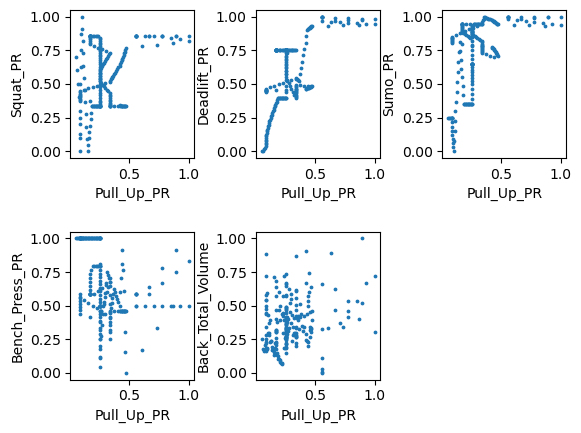

In [628]:
#'Pull_Up_PR' 跟 其他 PR 關係
#pr_keys = ['Squat_PR','Deadlift_PR','Sumo_PR','Bench_Press_PR','Pull_Up_PR']

fig = plt.figure()
fig.add_subplot(231)
scatter_by_label(combine_df, 'Pull_Up_PR','Squat_PR')
fig.add_subplot(232)
scatter_by_label(combine_df, 'Pull_Up_PR','Deadlift_PR')
fig.add_subplot(233)
scatter_by_label(combine_df, 'Pull_Up_PR','Sumo_PR')
fig.add_subplot(234)
scatter_by_label(combine_df, 'Pull_Up_PR','Bench_Press_PR')
fig.add_subplot(235)
scatter_by_label(combine_df, 'Pull_Up_PR','Back_Total_Volume')


plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()


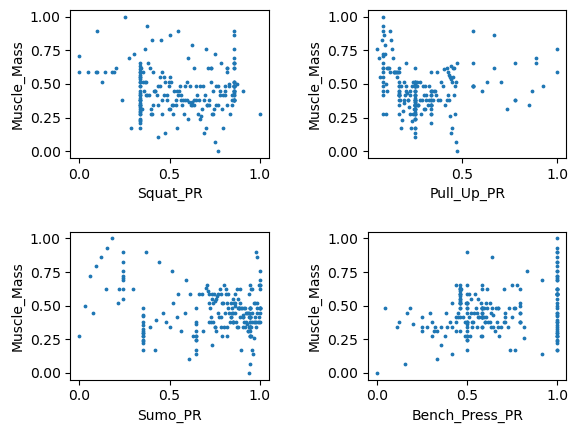

In [629]:
fig = plt.figure()
fig.add_subplot(221)
scatter_by_label(combine_df, 'Squat_PR','Muscle_Mass')
fig.add_subplot(222)
scatter_by_label(combine_df, 'Pull_Up_PR','Muscle_Mass')
fig.add_subplot(223)
scatter_by_label(combine_df, 'Sumo_PR','Muscle_Mass')
fig.add_subplot(224)
scatter_by_label(combine_df, 'Bench_Press_PR','Muscle_Mass')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

#scatter_by_label(combine_df,'Sumo_PR','Squat_PR')
#scatter_by_label(combine_df,'Sumo_PR','Deadlift_PR')
#scatter_by_label(combine_df,'Sumo_PR','Bench_Press_PR')
#scatter_by_label(combine_df,'Sumo_PR','Pull_Up_PR')

#print(combine_df)


In [630]:
#g = sns.PairGrid(combine_df)
#g.map(plt.scatter)